<a href="https://colab.research.google.com/github/mr-ayush-agrawal/DL_Notebooks/blob/main/Lectt/Age_and_Sex_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'utkface-new:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F44109%2F78156%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240723%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240723T005642Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D44b97922fdab8d80242d497994ff8ea7cbc879d3fdfcafef5878260f5b22d3c4039d29725e862624eb6af3955dd8a671da5550637bd3f8139c1263e9de1a81931837ac628939747b934289886a2232f5714fbd27c0ffdd70dd6790976edf38e9ff0f5b03204bac66c7eac9d54a2276f7d829999f0501d78063e84fcbe615d69c4336564fb9c46dd697236d68726b7a20472b272e7a010d1ea1114b3398a598d696988dfaf13dd11a066ebac0cc8204aca73e455160a61366b9e133c4536c7a6f143ea0dfb4e496c97870d21adf3f49747487a165224b1e3e7a92e22cb7d76bc137dd6057cece0cdba731c1970fe9e70bf3137b8bcf4533aafe50e590c0a61cba'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 347342542 bytes downloaded
Downloaded and uncompressed: utkface-new
Data source import complete.


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
count = 0
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        count+=1
print(count)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/utkface-new/crop_part1/4_1_0_20161219201246716.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/2_0_2_20161219161049398.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/84_1_0_20170110160644173.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/53_0_0_20170111171747396.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/45_1_1_20170109221115578.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/38_1_3_20170105002602973.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/27_1_3_20170104231741609.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/34_0_0_20170103182639105.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/24_1_4_20161223231327524.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/1_0_2_20161219222046607.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/10_0_0_20170110225444491.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/7_0_0_20170110225211960.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/37_1_0_201701031

NameError: name 'pritn' is not defined

In [25]:
age = []
sex = []
img = []
folder_path = '/kaggle/input/utkface-new/UTKFace'
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  sex.append(int(file.split('_')[1]))
  img.append(file)

len(age)

23708

In [26]:
img[:5]

['15_1_4_20170103201254359.jpg.chip.jpg',
 '24_0_3_20170119165641406.jpg.chip.jpg',
 '16_1_0_20170104012420681.jpg.chip.jpg',
 '9_0_0_20170110224835799.jpg.chip.jpg',
 '35_0_0_20170116003147625.jpg.chip.jpg']

In [27]:
print(len(os.listdir('/kaggle/input/utkface-new/UTKFace')))
print(len(os.listdir('/kaggle/input/utkface-new/crop_part1')))

23708
9780


In [29]:
data = pd.DataFrame({'age':age, 'sex': sex, 'img':img})
data.shape

(23708, 3)

In [30]:
data.sample(5)

,age,sex,img
21348,20,1,20_1_0_20170114031424981.jpg.chip.jpg
3161,29,1,29_1_1_20170114024847193.jpg.chip.jpg
11086,32,1,32_1_0_20170116002157320.jpg.chip.jpg
1915,40,0,40_0_0_20170117154505308.jpg.chip.jpg
7224,32,1,32_1_0_20170117182456548.jpg.chip.jpg


In [42]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(data, random_state = len(data), test_size=0.15)

In [43]:
train_df.shape, val_df.shape

((20151, 3), (3557, 3))

In [44]:
val_df.reset_index(drop=True)
train_df.reset_index(drop=True)

,age,sex,img
0,21,1,21_1_3_20170104222046054.jpg.chip.jpg
1,4,1,4_1_0_20170109204913999.jpg.chip.jpg
2,29,0,29_0_2_20170116164431232.jpg.chip.jpg
3,30,0,30_0_0_20170116224623527.jpg.chip.jpg
4,31,1,31_1_1_20170116024050198.jpg.chip.jpg
...,...,...,...
20146,27,1,27_1_0_20170117175951091.jpg.chip.jpg
20147,63,1,63_1_0_20170117175356028.jpg.chip.jpg
20148,70,1,70_1_0_20170120134300289.jpg.chip.jpg
20149,26,0,26_0_3_20170119172209840.jpg.chip.jpg


In [53]:
# Importing Files
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg16 import VGG16
from keras.utils import plot_model

### Applying Data Agumentation

In [46]:
train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 30,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    shear_range = 0.1,
    horizontal_flip= True
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

In [49]:
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    directory=folder_path,
    x_col = 'img',
    y_col = ['age', 'sex'],
    target_size = (224, 224),
    class_mode = 'multi_output'
)
test_gen = test_datagen.flow_from_dataframe(
    val_df,
    directory=folder_path,
    x_col = 'img',
    y_col = ['age', 'sex'],
    target_size = (224, 224),
    class_mode = 'multi_output'
)

Found 20151 validated image filenames.
Found 3557 validated image filenames.


In [51]:
vgg = VGG16(include_top = False, input_shape = (224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [62]:
vgg.trainable = False

vgg_res = vgg.layers[-1].output

flat = Flatten()(vgg_res)

FC = Dense(512, 'relu')(flat)

AgeD1 = Dense(256, 'relu')(FC)
SexD1 = Dense(256, 'relu')(FC)

AgeD2 = Dense(256, 'relu')(AgeD1)
SexD2 = Dense(256, 'relu')(SexD1)

AgeD3 = Dense(64, 'relu')(AgeD2)
SexD3 = Dense(64, 'relu')(SexD2)

AgeRes = Dense(1, 'linear', name = 'Age')(AgeD3)
SexRes = Dense(1, 'sigmoid', name = 'Sex')(SexD3)

In [63]:
model = Model(inputs = vgg.input, outputs = [AgeRes, SexRes])

In [64]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 224, 224, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

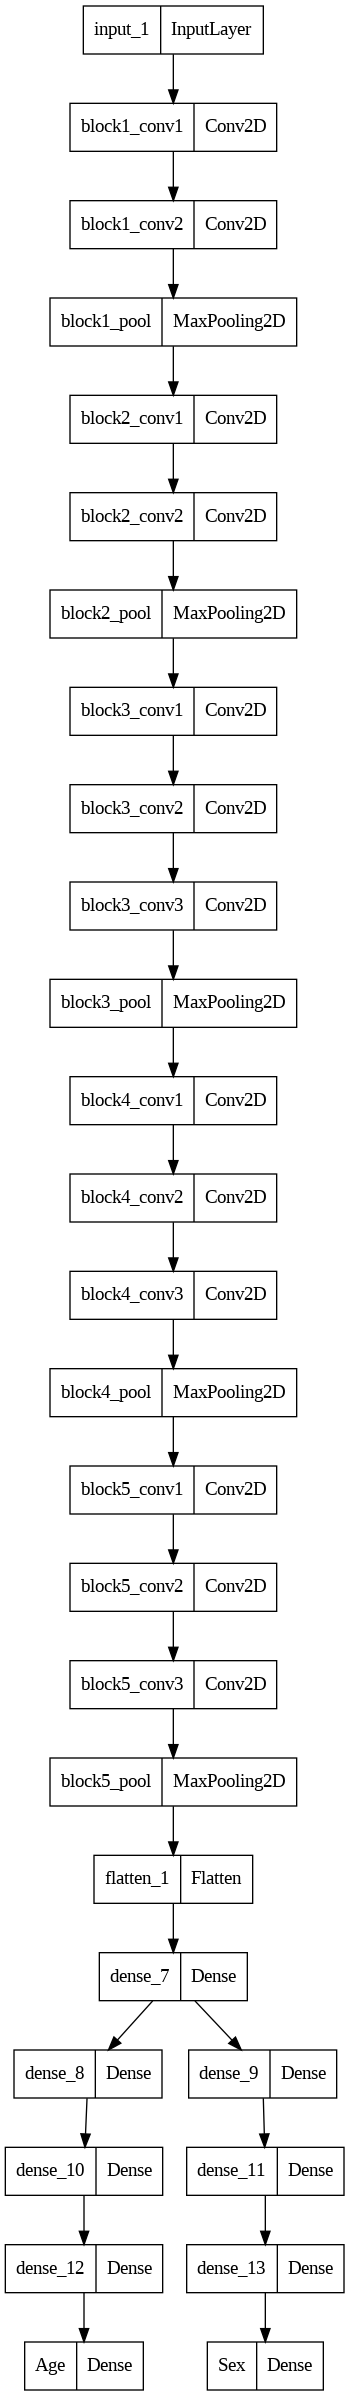

In [65]:
plot_model(model)

In [70]:
model.compile(
    optimizer = 'adam',
    loss = {
        'Age': 'mae',
        'Sex': 'binary_crossentropy'
    },
    metrics =  {
        'Age': 'mae',
        'Sex': 'accuracy'
    },
    loss_weights = {
        'Age': 1,
        'Sex': 30
    }
)

In [71]:
model.fit(train_gen, batch_size = 80, epochs = 10, validation_data = test_gen)

Epoch 1/10
  4/630 [..............................] - ETA: 2:58:33 - loss: 66.2191 - Age_loss: 22.4252 - Sex_loss: 1.4598 - Age_mae: 22.4252 - Sex_accuracy: 0.5625

KeyboardInterrupt: 